# Krigelés

A geostatisztikában általában, de különösen a bányászatban alkalmazzák a feltalálójáról, a dél-afrikai Krige professzorról krigelésnek nevezett súlyozott optimális becslési eljárást. A krigelés kiterjedten alkalmazott interpolációs eljárás a különböző GIS rendszerekben. A Golden Software népszerű Surfer felületmodellező programja is tartalmazza a krigelést mint fontos interpolációs módszert. A krigelésről részletes összefoglalót ad Steiner F. A geostatisztika alapjai (1990) c. tankönyve.

A geostatisztika egyedülálló vonása az ún. *regionalizált* változók alkalmazása, amely változók jellegükben a véletlen (eratikus) és teljesen determinisztikus (strukturált) változók közé esnek. Regionalizált változók írják le a térbeli helyzettel is jellemezhető jelenségeket (például a felszín magassága). A regionalizált változót szokásosan *z* vagy *Z* betűvel jelölik a geostatisztikában. A jelenség térben folytonos; ennek ellenére nem minden pontban lehetséges a mintavételezés.

Röviden összefoglalva a geostatisztikai elemzés általában a következő lépéseket foglalja magában:
* a minták közötti térbeli autokorreláció becslése
* a térbeli autokorrelációs modell paramétereinek becslése
* a felszíni pont becslése pont krigeléssel
* az átlagértékek becslése blokk krigeléssel

A térbeli autokorrelációt elemezhetjük korrelogram, kovariancia függvény vagy variogram (=félvariogram) felhasználásával. A kovariancia függvényről Detrekői Á. Kiegyenlítő számítások (1981) c. tankönyve ad áttekintést. 

## A félvariogram

A regionalizált változók elmélete a *félvarianciát* használja a felszíni pontok egymáshoz vett viszonya mértékének jellemzésére. A félvariancia az egymástól állandó *d* távolságra levő (ez a *d* a *szeparáció*, mely 2 dimenziós esetben vektor mennyiség) összes lehetséges pontban a regionalizált változó értékek különbségei varianciájának a fele.

A félvariancia nagysága a minták térbeli függőségi fokának a mértéke. Ha a távolság kisebb, a félvariancia is kisebb; nagyobb távolság nagyobb félvarianciát hoz magával. A félvarianciák grafikonja a távolság függvényében a *félvariogram* vagy variogram:

$$ \gamma(d)= \frac{1}{2Nd} \sum_{i=1}^{N(d)}(z_i - z_{i+d})^2 \qquad i=1,...,n ,$$

ha $N(d)$ jelöli az adatpontok párjainak számát, $z_i$ az adatpontokat elválasztó $d$ vektor kezdőpontja, $z_{i+d}$ a végpontja. A gamma érték tehát a $d$ vektor által elválasztott adatponti párok értékei különbsége átlagos négyzetének a fele. A variogramot a térben mért tulajdonságok térbeli korrelációjának leírására használjuk. Nem más, mint az egymástól $d$ távolságra levő értékek hasonlóságának (a két érték közötti kovarianciának) a mértéke.

Bár a félvariogram és a kovariancia látszólag hasonlóak, a félvariogram számításához nem kell a *stacionaritás* hipotézise. Ezen kívül a félvariogram számítása nem igényli a regionalizált változó m(x) átlagát míg a kovariancia igen.

A félvariogram jellegzetességei között megemlíthetjük azt, hogy a $d = 0$ értéknél zérus értéket kell felvennie, mivel a pontot önmagával összehasonlítva az értékek különbsége zérus. A tapasztalat azt mutatja, hogy sok variogramnak ugrása van a $d = 0$ értéknél, ami sokszor a regionalizált változóban meglevő struktúrálatlan ’zaj’ komponens hatásának tulajdonítható. Ez az ugrás a $röghatás$ (nugget effect). A röghatás oka lehet az is, hogy a minta intervallumnál sokkal kisebb hatástávolságú, nagyon kis léptékű strukturált komponens van jelen. 

Növekvő $d$ távolságra a félvariancia is növekszik. Ezután egy adott $d$ távolságon, amit *hatástávolság*nak (range) nevezünk, a félvariancia körülbelül egyenlő lesz a felület varianciájával. Ez a maximális érték a *tető* (sill). A hatástávolság az a maximális távolság, amelyre a felület egyik pontja még kapcsolatban van egy másik ponttal. A hatástávolság a pontnak azt a maximális környezetét definiálja, amelyen belül kell a pontjainkat egy tetszőleges pont függvényértékének interpolálásához kiválasztanunk a pontok közötti statisztikai korreláció kiaknázása érdekében. Olyan körülmények között, amikor az interpolálandó pont és a rácspontok távolsága meghaladja a hatástávolságot, a krigelés ugyanazt az eredményt adja mint a hagyományos statisztika, vagyis az átlagértéket. 

A félvariogram most tárgyalt jellemzőit az alábbi ábrán mutatjuk be.
![](variogram.png)

A variogram *egyszerű*, ha egyetlen változó térbeli függését méri és *kereszt*, ha két különböző változó függését jellemzi. Az egyszerű variogram mindig pozitív vagy zérus értékű, mivel egyfajta variancia. Ha egy változónak nincs térbeli függése, horizontális variogramot eredményez, amely csak zérus $d$ távolságon zérus. 

A kereszt (fél)variogram felvehet negatív, zérus és pozitív értékeket is, mivel egyfajta kovariancia. Annyi kereszt-variogram van, ahány különböző változó pár található. Ahol a kereszt variogram pozitív, ha a két változó hajlamos együttesen változik, ellenkező esetben, ha a kereszt variogram negatív, a két változó jórészt egymással ellentétesen változik. Ott lesz zérus, ahol a változók egymástól függetlenül változnak.

A félvariogramot a *tapasztalati félvariogram* segítségével becsüljük, amely az adatponti értékekből kapott félvariogram. A variogramot az adatokból különböző irányokra állítjuk elő. Ezek általában az É-D, K-Ny, ÉK-DNy és ÉNy-DK irányok. Amennyiben adataink nem szabályos hálóba rendezettek, úgy bizonyos eltéréseket engedünk meg a variogram számításakor, vagy is az összes lehetséges $d$ szeparációs vektorokat különböző osztályokba soroljuk (lásd az alábbi ábrát).
![](tapasztalati.png)

Amennyiben a szeparációs vektorok ugyanabba a cellába esnek, akkor azonos osztályba soroljuk őket és a variogram értéket külön becsüljük minden osztályra. Az irányok száma nem csak 8 lehet, hanem ettől eltérő is (4, 8, 16, stb). Ha a megengedett szögeltérés +/– 90º, akkor az összes adatpont értékét tartalmazni fogja a számítás.

### Minta adatok

Az egyszerű krigelés illusztrálásához a [következő adatokat](https://github.com/cjohnson318/geostatsmodels/blob/master/data/ZoneA.dat) használjuk fel. Először is betöltünk néhány szükséges Python modult majd beolvassuk az adatokat a `ZoneA.dat` állományból.

In [1]:
from pylab import *
import numpy as np
from pandas import DataFrame, Series
from scipy.spatial.distance import pdist, squareform
z = open( 'ZoneA.dat','r' ).readlines()
# a file 11. sorától kezdődnek az adatok, összesen 85 sorban
z = [ i.strip().split() for i in z[10:] ]  
z = np.array( z, dtype=np.float )
# a DataFrame 2D címkézett, oszlopokba szervezett adatszerkezet
# x,y koordináták és a számunkra érdekes hézagtényező ('por') adatok
z = DataFrame( z, columns=['x','y','thk','por','perm','lperm','lpermp','lpermr'] )

Felrajzoljuk a [*hézagtényező*](http://www.tankonyvtar.hu/hu/tartalom/tamop425/0033_SCORM_MFKHT6504SI/sco_01_01.scorm) adatokat:

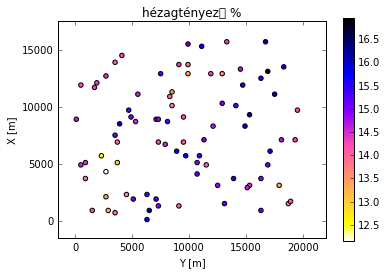

In [2]:
%matplotlib inline
from __future__ import unicode_literals
fig, ax = subplots()
img=ax.scatter( z.x, z.y, c=z.por, cmap='gnuplot2_r' )
colorbar(img)
ax.set_aspect(1)
xlim(-1500,22000)
ylim(-1500,17500)
xlabel('Y [m]')
ylabel('X [m]')
title('hézagtényező %') ;

### Tapasztalati variogram számítása

A tapasztalati variogram számításához függvényeket írunk, amelyekkel kiszámítjuk a félvariogramot az alábbiak szerint, illetve a későbbiek miatt a kovariancia függvényt az [itt](http://connor-johnson.com/2014/03/20/simple-kriging-in-python/) található példa szerint:

In [3]:
def SVh( P, h, bw ):
    '''
    Tapasztalati félvariogram egyetlen távolságra
    '''
    pd = squareform( pdist( P[:,:2] ) )
    N = pd.shape[0]
    Z = list()
    for i in range(N):
        for j in range(i+1,N):
            if( pd[i,j] >= h-bw )and( pd[i,j] <= h+bw ):
                Z.append( ( P[i,2] - P[j,2] )**2.0 )
    return np.sum( Z ) / ( 2.0 * len( Z ) )
 
def SV( P, hs, bw ):
    '''
    Tapasztalati variogram több távolságra
    '''
    sv = list()
    for h in hs:
        sv.append( SVh( P, h, bw ) )
    sv = [ [ hs[i], sv[i] ] for i in range( len( hs ) ) if sv[i] > 0 ]
    return np.array( sv ).T
 
def Cov( P, h, bw ):
    '''
    A tető számítása
    '''
    c0 = np.var( P[:,2] )
    if h == 0:
        return c0
    return c0 - SVh( P, h, bw )

Kiszámítjuk és felrajzoljuk a tapasztalati félvariogramot:

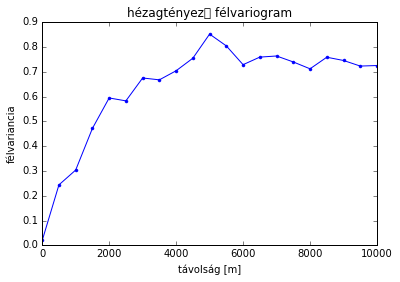

In [4]:
# az adatokban szereplő hézagtényező
P = np.array( z[['x','y','por']] )
# lépésköz, plusz vagy minusz 250 méter
bw = 500
# távolságok 500 méteres lépésközzel 0-tól 10000-ig
hs = np.arange(0,10500,bw)
sv = SV( P, hs, bw )
plot( sv[0], sv[1], '.-' )
xlabel('távolság [m]')
ylabel('félvariancia')
title('hézagtényező félvariogram') ;
show()
# savefig('minta_felvariogram.png',fmt='png',dpi=200)

### Elméleti variogram modellek

A mérési eredményekből szerkesztett variogram nem sima függvény, ezért a numerikus kezelhetőség megkívánja, hogy valamilyen elméleti függvénnyel közelítsük a tapasztalati variogramot. A gyakorlatban sokszor a legkisebb négyzetek módszerével illesztjük az elméleti függvényt (annak paramétereit kiegyenlítéssel meghatározva) a tapasztalati értékekhez. Az elméleti modellek között megemlítjük a következő hármat:

### 1. gömbi modell

$$ \gamma(d)=C \left[ 1.5\frac{d}{a} - 0.5\left(\frac{d}{a}\right)^3 \right] \qquad \mathrm{ha} \quad 0 \le d \le a $$
$$ \gamma(d)=C \qquad \mathrm{ha} \quad d>a$$

### 2. exponenciális modell

$$ \gamma(d)=C \left[ 1-e^{-\frac{3d}{a}}  \right]$$

aszimptotikusan simul $C$-hez, gyakorlati hatástávolsága $\gamma(a)=0.95C$.

### 3. lineáris modell

$$ \gamma(d)=C \frac{d}{a}, \qquad \mathrm{ha} \quad 0\le d \le a$$
$$ \gamma(d)=C  \qquad \mathrm{ha} \quad 0\le d \le a$$

Ha a röghatás $C_0$ értékét is figyelembe vesszük, a fenti modellek módosíthatók ezzel az értékkel. 

### Elméleti félvariogram modell illesztése

A minta hézagtényező adatokhoz a gömbi modellt illesztjük. Először egy `opt()` függvényt írunk a gömbi modell optimális illesztéséhez.

In [5]:
def opt( fct, x, y, C, parameterRange=None, meshSize=1000 ):
    if parameterRange == None:
        parameterRange = [ x[1], x[-1] ]
    mse = np.zeros( meshSize )
    a = np.linspace( parameterRange[0], parameterRange[1], meshSize )
    for i in range( meshSize ):
        mse[i] = np.mean( ( y - fct( x, a[i], C ) )**2.0 )
    return a[ mse.argmin() ]

Az  `opt()` függvény a tapasztalati félvariogram adatokhoz legjobban illeszkedő gömbi modell paramétereit határozza meg. A gömbi modellt a `gombi()` függvény definiálja. A függvény utolsó sorában azt látjuk, hogy a `gombi()` saját magát adja vissza a `map()` függvényben, ami furcsának tűnhet.  Az az elképzelés, hogy a `h` input lehet egyetlen valós szám vagy számok listája illetve NumPy tömbje. Ha `h` csak egyetlen érték, akkor a 9. sorra ugrunk. Ha `h` lista vagy tömb, akkor a 17. sort futtatjuk, amely a 9. sort alkalmazza `h` összes elemére.

In [6]:
def gombi( h, a, C ):
    '''
    Gömbi félvariogram modell
    '''
    # amennyiben h egyetlen szám
    if type(h) == np.float64:
        # számítjuk a gömbi félvariogram függvényt
        if h <= a:
            return C*( 1.5*h/a - 0.5*(h/a)**3.0 )
        else:
            return C
    # ha h-nak több eleme van
    else:
        # számoljuk ki a gömbi félvariogram függvényt az összes elemre
        a = np.ones( h.size ) * a
        C = np.ones( h.size ) * C
        return map( gombi, h, a, C )

Ezek után a `cvmodel()` eljárás illeszti a modellt a tapasztalati félvariogram adatokra és visszaadja a `covfct()` nevű kovariancia eljárást.

In [7]:
def cvmodel( P, model, hs, bw ):
    '''
    Bemenet:(P)      ndarray, adatok
            (model)  modell függvény
                      - gömbi
                      - exponenciális
                      - Gauss-féle
            (hs)     távolságok
            (bw)     lépésköz
    Kimenet:(covfct) kovariancia modellező függvény
    '''
    # számítjuk a félvariogrammot
    sv = SV( P, hs, bw )
    # számítjuk a tetőt
    C = Cov( P, hs[0], bw )
    print "C: %.4f" % C 
    # számítjuk az optimális paramétert
    param = opt( model, sv[0], sv[1], C )
    print "a: %.1f" % param 
    # visszaadjuk a kovariancia függvényt
    covfct = lambda h, a=param: C - model( h, a, C )
    return covfct

Geoff Bohling egyszerű [példáját](http://people.ku.edu/~gbohling/cpe940/Kriging.pdf) fogjuk használni először. Kiválasztjuk az ehhez szükséges 6 adatot az x=[0,4300], y=[3200,5900] tartományból.

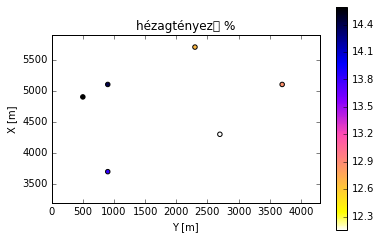

In [8]:
zs = z[(z['x']<4300.0) & (z['x']>0.0) & (z['y']<5900.0) & (z['y']>3200.0)]
# felrajzoljuk
fig, ax = subplots()
img=ax.scatter( zs.x, zs.y, c=zs.por, cmap='gnuplot2_r' )
colorbar(img)
ax.set_aspect(1)
xlim(0,4300)
ylim(3200,5900)
xlabel('Y [m]')
ylabel('X [m]')
title('hézagtényező %') ;

A Bohling által közölt $C(h)$ kovariancia függvényt fogjuk használni a $h<4141\; \mathrm{m}$-es távolságig, utána pedig zérust:

$$ C(h) = C(0) -\gamma (h)=0.78\cdot\left(1-1.5\cdot (h/4141) +0.5\cdot (h/4141)^3\right)$$

In [9]:
def CB(h):
    c = np.zeros_like(h)
    c = 0.78*(1 - 1.5*h[h<4141]/4141 + 0.5*(h[h<4141]/4141)**3)
    if len(h.shape) == 1:
        return c
    else:
        return np.reshape(c,(h.shape[0],h.shape[1]))

## Egyszerű krigelés (simple kriging)

Az egyszerű krigelés esetében az átlagot konstansnak vesszük a teljes számítási tartományban. Ebben az esetben a krigelés optimális $\mathbf{W}$ súlyait az alábbi mátrix egyenletből kaphatjuk meg

$$\mathbf{W} = \mathbf{K}^{-1} \mathbf{k},$$

ahol $\mathbf{K}$ az adatpontok kovariancia mátrixa,  $\mathbf{k}$ az adatpontok és számítási pont kovariancia vektora.

A pont, amelyben a krigelési becslést szeretnénk elvégezni, az **u**=(2000 m, 4700 m) koordinátájú pont. Számítsuk ki itt a **k** vektort és a **K** mátrixot a C(h) kovariancia függvény segítségével, majd végezzük el egyszerű krigeléssel a súlyok becslését.

In [10]:
u = np.array([2000.0, 4700.0])
# távolságok vektora 
x = np.array(zs.x)
y = np.array(zs.y)
h = np.sqrt((x-u[0])**2 + (y-u[1])**2)
k = CB(h)
# távolságok mátrixa
dx = x[...,np.newaxis]-x[np.newaxis,...]
dy = y[...,np.newaxis]-y[np.newaxis,...]
d = np.array([dx,dy])
d = (d**2).sum(axis=0)**0.5
#print d.shape
K = CB(d)
#print K.shape
# súlyok becslése egyszerű krigeléssel
lam = np.dot(np.linalg.inv(K),k)
print "a számított súlyok: ",
# 4 tizedesre formázott kiíratás
float_formatter = lambda x: "%.4f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
print lam

a számított súlyok:  [0.1475 -0.0205 0.2709 0.4564 0.2534 -0.0266]


A krigelés nem más, mint a fenti súlyokkal számított súlyozott adatösszeg:

In [11]:
zkrige = np.sum(lam*zs.por)
print "krigelésből becsült hézagtényező érték: ",
print "%.2f" % zkrige

krigelésből becsült hézagtényező érték:  14.02


### Az összes adattal számolva

Először kiszámítjuk a modellt és megnézzük egy ábrán, hogy jól illeszkedik-e az adatainkra:

C: 0.7776
a: 3961.5


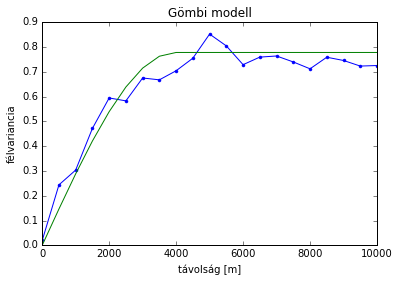

In [12]:
sp = cvmodel( P, model=gombi, hs=np.arange(0,10500,500), bw=500 )
plot( sv[0], sv[1], '.-' )
plot( sv[0], sp(sv[0])[0] - sp( sv[0] ) ) ;
title('Gömbi modell')
ylabel('félvariancia')
xlabel('távolság [m]')
show()
# savefig('felvariogram_model.png',fmt='png',dpi=200)

## Közönséges krigelés (ordinary kriging)

A krigelés a regionalizált $z$ változó ismeretlen értékeinek meghatározására szolgáló súlyozott optimális becslési eljárás. Egyik népszerű alkalmazási területe rácsadatok térképének előállítása szabálytalan ponthalmazon adott értékekből. A krigelés szemre is tetszetős felületet interpolál és képes az adatainkban levő trend figyelembe vételére (ez az ún. *univerzális krigelés*).

A krigelés másik előnye az, hogy *robusztus* eljárás, nem érzékeny túlzottan az alkalmazott variogram modellre, tehát még annak naiv megválasztása mellett is értelmes eredményeket szolgáltat. Ezenkívül képes tekintetbe venni az adatok geometriai anizotrópiáját (vagyis azt az esetet, amikor a különböző irányokban számított variogram hatástávolsága változik).
A krigelés legegyszerűbb formája a pontonként előállított becslés, a *pont krigelés*. Ekkor az ismeretlen értéket a krigelés az alábbi ($W_i$ súlyokkal súlyozott) lineáris becsléssel adja meg: 

$$ z_e(p)=\sum_{i=1}^{n}W_i z(p_i).$$

A becsült $z_e(p)$ érték minden bizonnyal különbözni fog az adott pontbeli tényleges $z_a(p)$ értéktől és ez a különbség a *becslési hiba*:

$$ \epsilon = z_e(p) - z_a(p)$$

Ha nincs *drift* vagy *trend* (azaz a regionalizált változó átlaga minden pontban zérus), akkor a súlyok összege 1 (normált súlyok) és a becslés torzítatlan. A becslések szórása a tényleges értékek körül a becslési hiba variancia, 

$$ \sigma_z^2=\frac{\sum_{i=1}^{n}[z_e(p_i)-z_a(p_i)]^2}{n}.$$

A becslés és a becslési hiba a választott súlyoktól függ. A krigelés ideális esetben olyan optimális súlyozást szolgáltat, amelyiknek a becslési hibája minimum. A minimalizációs feladatot a Lagrange-féle multiplikátor módszerrel feltételes szélsőérték problémára vezethetjük vissza. Ha $\lambda$–val jelöljük a Lagrange-féle multiplikátort, akkor a krigelés az alábbi lineáris egyenletrendszer megoldását jelenti az ismeretlen **W** súlyokra:

$$ \mathbf{A}\mathbf{W} = \mathbf{B},$$

ahol

$$ \mathbf{A}=\begin{pmatrix}
 \gamma(d_{11})&  \gamma(d_{12}) &  \cdots &  \gamma(d_{1n}) & 1 \\ 
 \gamma(d_{21})& \gamma(d_{22}) & \cdots & \gamma(d_{2n}) & 1 \\ 
 \vdots & \vdots & \ddots & \vdots & \vdots \\ 
 \gamma(d_{n1}) & \gamma(d_{n2}) &  \cdots & \gamma(d_{nn}) & 1 \\ 
 1 & 1 &  \cdots & 1 & 0
\end{pmatrix}, \qquad \mathbf{W}=\begin{pmatrix}
 W_1 \\ 
 W_2 \\ 
 \vdots \\ 
 W_n \\ 
 1 
\end{pmatrix} \qquad \mathrm{és} \qquad \mathbf{B}=\begin{pmatrix}
 \gamma(d_{1p}) \\ 
 \gamma(d_{2p}) \\ 
 \vdots \\ 
 \gamma(d_{np}) \\ 
 1 
\end{pmatrix}.$$

Az $\mathbf{A}$ mátrixot szokták *Krige-mátrixnak* nevezni. Az $\mathbf{A}$ mátrixban és a  $\mathbf{B}$  vektorban található elemeket az elméleti félvariogramból számítjuk ki. Miután meghatároztuk az optimális $\mathbf{W}$ súlyokat, a becslést elő tudjuk állítani. A krigelés varianciáját pedig a

$$ \sigma_z^2=\mathbf{W}^T \mathbf{B}$$

kifejezés szolgáltatja.

### Egyszerű krigeléssel 

Megírjuk az egyszerű krigelés becslés Python függvényét:

In [13]:
def krige( P, covfct, hs, bw, u, N ):
    '''
    Bemenet:(P)     ndarray, adat
            (covfct) illesztett kovariancia modell függvény
            (hs)    krigelés távolságok
            (bw)    krigelés lépésköz
            (u)     becslési pont
            (N)     a tekintetbe vett szomszédok száma
    '''
 
    # a változó átlaga
    mu = np.mean( P[:,2] )
 
    # az u becslési pont és a P-ben levő adatpontok távolságai
    d = np.sqrt( ( P[:,0]-u[0] )**2.0 + ( P[:,1]-u[1] )**2.0 )
    # adjuk ezeket hozzá P-hez
    P = np.vstack(( P.T, d )).T
    # rendezzük P-t távolságok szerint
    # vegyük az első N db-ot
    P = P[d.argsort()[:N]]
 
    # alkalmazzuk a kovariancia modellt a távolságokra
    k = covfct( P[:,3] )
    # legyen belőle mátrix
    k = np.matrix( k ).T
 
    # számítsuk ki az adatpontok távolság mátrixát
    K = squareform( pdist( P[:,:2] ) )
    # számítsuk ki a kovarianciákat a távolságokra
    K = covfct( K.ravel() )
    # legyen NumPy tömb belőle
    K = np.array( K )
    # formázzuk helyes méretre
    K = K.reshape(N,N)
    # legyen belőle mátrix
    K = np.matrix( K )
 
    # számítsuk ki a krígelés súlyait
    weights = np.linalg.inv( K ) * k
    weights = np.array( weights )
 
    # számítsuk ki a maradékokat
    residuals = P[:,2] - mu
 
    # végezzük el a becslést
    estimation = np.dot( weights.T, residuals ) + mu
 
    return float( estimation )

Egy 80x100-as rács pontjaiban számítsuk ki a becslést krigeléssel:

In [14]:
# illesszük az adatokra a modell kovariancia függvényt
covfct = cvmodel( P, gombi, hs, bw )
# állítsuk elő a rácspontokat
X0, X1 = P[:,0].min(), P[:,0].max()
Y0, Y1 = P[:,1].min(), P[:,1].max()
Z = np.zeros((80,100))
dx, dy = (X1-X0)/100.0, (Y1-Y0)/80.0
# minden rácspontra krigeljünk
for i in range( 80 ):
    print i,
    for j in range( 100 ):
        Z[i,j] = krige( P, covfct, hs, bw, (dy*j,dx*i), 16 )

C: 0.7776
a: 3961.5
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79


Rajzoljuk fel a krigeléssel interpolált rácsot és az eredeti pontokat.

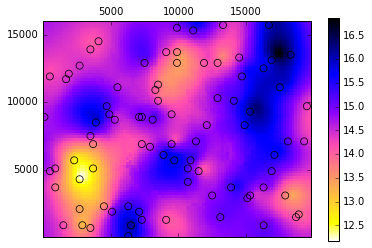

In [15]:
fig, ax = subplots()
img=ax.matshow( Z, cmap=get_cmap('gnuplot2_r'), interpolation='nearest' )
colorbar(img)
ax.scatter( z.x/200.0, z.y/200.0, facecolor='none', linewidths=0.75, s=50 )
xlim(0,99) ; ylim(0,80)
xticks( [25,50,75], [5000,10000,15000] )
yticks( [25,50,75], [5000,10000,15000] )
show() 
# savefig( 'krigeles.png', fmt='png', dpi=200 )

### Közönséges krigeléssel

Megírjuk a közönséges krigeléshez szükséges módosított függvényeket is. A kovariancia helyett a félvariancia számítására van szükség:

In [16]:
def vmodel( P, model, hs, bw ):
    '''
    Bemenet:(P)      ndarray, adatok
            (model)  modell függvény
                      - gömbi
                      - exponenciális
                      - Gauss-féle
            (hs)     távolságok
            (bw)     lépésköz
    Kimenet:(vfct) félvariancia modellező függvény
    '''
    # számítjuk a félvariogrammot
    sv = SV( P, hs, bw )
    # számítjuk a tetőt
    C = Cov( P, hs[0], bw )
    print "C: %.4f" % C 
    # számítjuk az optimális paramétert
    param = opt( model, sv[0], sv[1], C )
    print "a: %.1f" % param 
    # visszaadjuk a félvariancia függvényt
    vfct = lambda h, a=param: model( h, a, C )
    return vfct

Illesztjük a félvarianciát is:

C: 0.7776
a: 3961.5


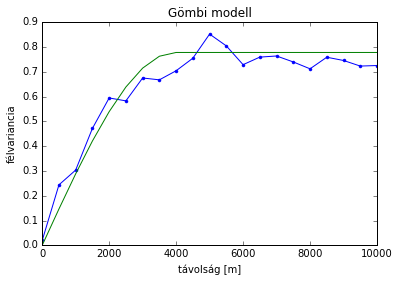

In [17]:
sp = vmodel( P, model=gombi, hs=np.arange(0,10500,500), bw=500 )
plot( sv[0], sv[1], '.-' )
plot( sv[0], sp( sv[0] ) ) ;
title('Gömbi modell')
ylabel('félvariancia')
xlabel('távolság [m]')
show()

Módosítjuk a krige függvényt, az új függvény neve krigeo lesz:

In [18]:
def krigeo( P, vfct, hs, bw, u, N ):
    '''
    Bemenet:(P)     ndarray, adat
            (vfct)  illesztett félvariancia modell függvény
            (hs)    krigelés távolságok
            (bw)    krigelés lépésköz
            (u)     becslési pont
            (N)     a tekintetbe vett szomszédok száma
    '''
 
    # az u becslési pont és a P-ben levő adatpontok távolságai
    d = np.sqrt( ( P[:,0]-u[0] )**2.0 + ( P[:,1]-u[1] )**2.0 )
    # adjuk ezeket hozzá P-hez
    P = np.vstack(( P.T, d )).T
    # rendezzük P-t távolságok szerint
    # vegyük az első N db-ot
    P = P[d.argsort()[:N]]
 
    # alkalmazzuk a kovariancia modellt a távolságokra
    k = vfct( P[:,3] )
    # legyen belőle mátrix (vektor)
    k = np.matrix( k ).T
    # bővítsük ki egy elemmel
    k = np.vstack((k,np.ones(1)))
 
    # számítsuk ki az adatpontok távolság mátrixát
    K = squareform( pdist( P[:,:2] ) )
    # számítsuk ki a kovarianciákat a távolságokra
    K = vfct( K.ravel() )
    # legyen NumPy tömb belőle
    K = np.array( K )
    # formázzuk helyes méretre
    K = K.reshape(N,N)
    # bővítsük ki egy sorral és egy oszloppal
    K = np.vstack((K,np.ones((1,N))))
    K = np.hstack((K,np.ones((N+1,1))))
    K[N-1,N-1] = 0.0
    
    # legyen belőle mátrix
    K = np.matrix( K )
 
    # számítsuk ki a krigelés súlyait
    weights = np.linalg.inv( K ) * k
    weights = np.array( weights )
    weights = weights[:-1,:]
 
    # számítsuk ki a maradékokat
    residuals = P[:,2]
 
    # végezzük el a becslést
    estimation = np.dot( weights.T, residuals )
 
    return float( estimation )

Teszteljük a függvényt egy pontban.

In [23]:
vfct = vmodel( P, gombi, hs, bw )
krigeo( P, vfct, hs, bw, (2000,4700), 16 )

C: 0.7776
a: 3961.5


13.026654099549441

Ismét egy 80x100-as rács pontjaiban számítsuk ki a becslést közönséges krigeléssel:

In [20]:
# illesszük az adatokra a modell félvariancia függvényt
vfct = vmodel( P, gombi, hs, bw )
# állítsuk elő a rácspontokat
X0, X1 = P[:,0].min(), P[:,0].max()
Y0, Y1 = P[:,1].min(), P[:,1].max()
Zo = np.zeros((80,100))
dx, dy = (X1-X0)/100.0, (Y1-Y0)/80.0
# minden rácspontra krigeljünk
for i in range( 80 ):
    print i,
    for j in range( 100 ):
        Zo[i,j] = krigeo( P, vfct, hs, bw, (dy*j,dx*i), 16 )

C: 0.7776
a: 3961.5
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79


Rajzoljuk fel a közönséges krigeléssel interpolált rácsot és az eredeti pontokat.

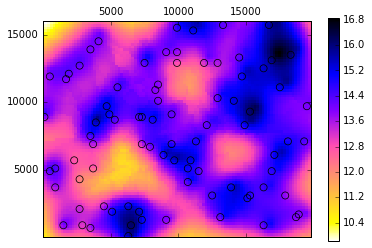

In [21]:
fig, ax = subplots()
img=ax.matshow( Zo, cmap=get_cmap('gnuplot2_r'), interpolation='nearest' )
colorbar(img)
ax.scatter( z.x/200.0, z.y/200.0, facecolor='none', linewidths=0.75, s=50 )
xlim(0,99) ; ylim(0,80)
xticks( [25,50,75], [5000,10000,15000] )
yticks( [25,50,75], [5000,10000,15000] )
show() 
# savefig( 'krigeles_o.png', fmt='png', dpi=200 )

Nézzük meg a közönséges és egyszerű krigelés módszerével kapott interpolált értékek eltéréseit.

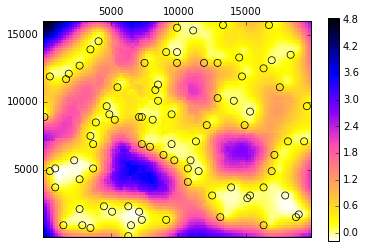

In [22]:
fig, ax = subplots()
img=ax.matshow( Z-Zo, cmap=get_cmap('gnuplot2_r'), interpolation='nearest' )
colorbar(img)
ax.scatter( z.x/200.0, z.y/200.0, facecolor='none', linewidths=0.75, s=50 )
xlim(0,99) ; ylim(0,80)
xticks( [25,50,75], [5000,10000,15000] )
yticks( [25,50,75], [5000,10000,15000] )
show() 
# savefig( 'krigelesek_elterese.png', fmt='png', dpi=200 )

Az eltérések ott nagyok, ahol nincsenek adatok. Itt nem meglepő módon bármelyik interpolációs eljárás csődöt mondana. A krigelés hibái teljes mértékben az adatok elhelyezkedésétől és a kovariancia függvénytől függenek. Lényegében a legközelebbi adatpont távolságait mutatják osztva a kovariancia függvénnyel.